In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pom import Node, Servo, Voxels

In [2]:
# Example 1.
v = Voxels()
v.add_servo(Node(2, 1, 3), Servo.Z)
v.add_effector(Node(0, 1, 3))
v.add_effector(Node(1, 1, 4))
v.actuate(-5)

array([[0., 0., 5.],
       [5., 0., 0.]])

In [3]:
# Example 2.
v = Voxels()
v.add_servo(Node(2, 1, 3), Servo.Z)
v.add_servo(Node(1, 2, 3), Servo.Z)
v.add_servo(Node(2, 3, 3), Servo.Z)
v.add_servo(Node(3, 2, 3), Servo.Z)

v.add_effector(Node(1, 3, 4))
v.add_effector(Node(1, 1, 4))
v.add_effector(Node(3, 1, 4))
v.add_effector(Node(3, 3, 4))

v.actuate(5, -5, 5, -5)

array([[-5., -5.,  0.],
       [-5.,  5.,  0.],
       [ 5.,  5.,  0.],
       [ 5., -5.,  0.]])

In [4]:
# Example 3.
v = Voxels()
v.add_servo(Node(2, 1, 3), Servo.Z)
v.add_effector(Node(4, 1, 3))
v.add_effector(Node(1, 1, 2))
v.actuate(5)

array([[ 0.,  0., -5.],
       [ 5.,  0.,  0.]])

In [5]:
# Example 4.
v = Voxels()
v.add_servo(Node(2, 1, 1), Servo.Z)
v.add_servo(Node(1, 2, 1), Servo.Z)
v.add_servo(Node(2, 3, 1), Servo.Z)
v.add_servo(Node(3, 2, 1), Servo.Z)

v.add_effector(Node(1, 3, 0))
v.add_effector(Node(1, 1, 0))
v.add_effector(Node(3, 1, 0))
v.add_effector(Node(3, 3, 0))

v.actuate(-5, 5, 0, 0)

array([[ 0., -5.,  0.],
       [-5.,  5.,  0.],
       [ 5.,  0.,  0.],
       [ 0.,  0.,  0.]])

# ALTERNATING PATTERN

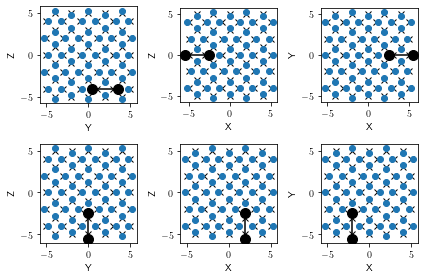

In [22]:
axis_names = np.array('X Y Z'.split())
dirs = np.array([Servo.X, Servo.Y, Servo.Z])

f, ax = plt.subplots(2, 3)

for i,plane in enumerate(dirs):
    inplane = np.arange(3) != plane
    for j,d in enumerate(dirs[inplane]):
        v = Voxels(0.5)
        pos = np.array([0, 0, 0])
        pos[d] = pos[plane] = 1
        pos[inplane] += 2*np.random.randint(-2,3, size=2)
        n = Node(*pos)
        n.nid += 3
        v.add_servo(n, d)
        
        def add_node(a, b):
            pos = np.array([1, 1, 1])
            pos[inplane] = (a, b)
            v.add_effector(Node(*pos))

        # Just create a ton of nodes in the plane
        # to show that they all move correctly.
        for a in range(-5,6):
            if a % 2 == 1:
                for b in range(-4,5,2):
                    add_node(a, b)
            else:
                for b in range(-5,6,2):
                    add_node(a, b)

        base_pos = np.array([e.pos for e in v.effectors])
        pos = base_pos + v.actuate(0.5)
        servo_locations = (
            (base_pos == v.servos[0].node.pos)
            |
            (base_pos == v.servos[0].other_node.pos)).all(axis=1)

        base_pos = base_pos[:, inplane]
        pos = pos[:, inplane]
        a = ax[j,i]
        a.set_aspect('equal')
        a.plot(base_pos[:,0], base_pos[:,1], 'kx')
        a.plot(pos[:,0], pos[:,1], 'o')
        a.plot(pos[servo_locations,0], pos[servo_locations,1],
               'ko-', ms=10)
        a.set_xlabel(axis_names[inplane][0])
        a.set_ylabel(axis_names[inplane][1])

# FORWARD KINEMATICS

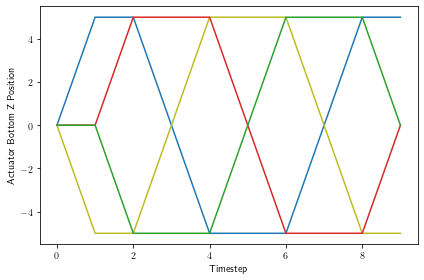

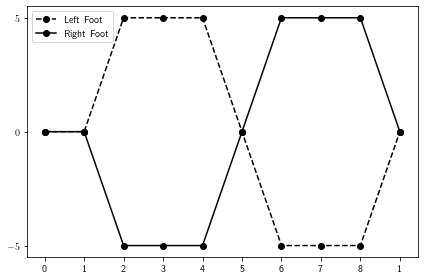

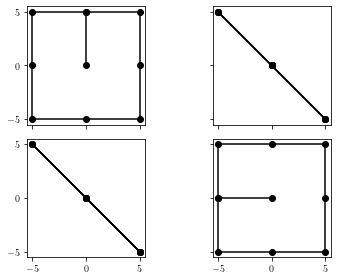

In [7]:
gait = np.array([
    [0, 5, 5, 0, -5, -5, -5, 0, 5, 5],
    [0, -5, -5, 0, 5, 5, 5, 0, -5, -5],
    [0, 0, 5, 5, 5, 0, -5, -5, -5, 0],
    [0, 0, -5, -5, -5, 0, 5, 5, 5, 0]])

# The gait starts in a resting pose, then loops the other
# 8 steps, with step 1 repeated at the end for completeness.
gait_step_names = '0 1 2 3 4 5 6 7 8 1'.split()

# Create four servos on a 2x2x2 block as in the robot.
v = Voxels()
v.add_servo(Node(2, 1, 1), Servo.Z)
v.add_servo(Node(1, 2, 1), Servo.Z)
v.add_servo(Node(2, 3, 1), Servo.Z)
v.add_servo(Node(3, 2, 1), Servo.Z)

# These end effectors are the four mocap markers.
v.add_effector(Node(1, 3, 4))
v.add_effector(Node(1, 1, 4))
v.add_effector(Node(3, 1, 4))
v.add_effector(Node(3, 3, 4))

# These two end effectors are the feet.
v.add_effector(Node(4, 3, 1))
v.add_effector(Node(3, 4, 1))

# Run the simulation and grab the separate markers.
yr, yb, gb, gr, rf, lf = v.simulate(gait)


plt.figure()
plt.plot(gait[0], 'C0')
plt.plot(gait[1], 'C8')
plt.plot(gait[2], 'C3')
plt.plot(gait[3], 'C2')
plt.xlabel('Timestep')
plt.ylabel('Actuator Bottom Z Position')


plt.figure()
plt.plot(lf[2], 'o--', color='k', label='Left Foot')
plt.plot(rf[2], 'o-', color='k', label='Right Foot')
plt.legend()
plt.xticks(range(10), gait_step_names)
plt.yticks([-5, 0, 5])


f, ax = plt.subplots(2, 2, sharex=True, sharey=True)
for a in ax.ravel():
    a.set_aspect('equal')
    a.set_xticks([-5, 0, 5])
    a.set_yticks([-5, 0, 5])
ax[0,0].plot(yr[0], yr[1], 'ko-')
ax[0,1].plot(gr[0], gr[1], 'ko-')
ax[1,0].plot(yb[0], yb[1], 'ko-')
ax[1,1].plot(gb[0], gb[1], 'ko-')

# INVERSE KINEMATICS

In [8]:
# Construct a system where the control nodes are actually
# four of the coordinates from the output above. It doesn't
# matter much which ones you choose, but the system needs to
# be determined completely by the four control nodes. Here,
# it's the Z of the front left and right feet plus the Y
# of the back left and the X of the back right foot.
v = Voxels()
v.add_servo(Node(3, 4, 1), Servo.Z)
v.add_servo(Node(4, 3, 1), Servo.Z)
v.add_servo(Node(1, 3, 4), Servo.Y)
v.add_servo(Node(3, 1, 4), Servo.X)

# Construct the corresponding desired trajectory.
fl_z = [0, 0, 5, 5, 5, 0, -5, -5, -5, 0]
fr_z = [0, 0, -5, -5, -5, 0, 5, 5, 5, 0]
bl_y = [0, 5, 5, 0, -5, -5, -5, 0, 5, 5]
br_x = [0, -5, -5, 0, 5, 5, 5, 0, -5, -5]
traj = np.array([fl_z, fr_z, bl_y, br_x])

# Now the "end effectors" of interest are actually the bottoms
# of the four servos, which were the inputs before.
v.add_effector(Node(2, 1, 1))
v.add_effector(Node(1, 2, 1))
v.add_effector(Node(2, 3, 1))
v.add_effector(Node(3, 2, 1))

# Run the simulation and extract the resulting servo extensions
# from the Z coordinate of the output.
gait = v.simulate(traj)[:, 2, :]

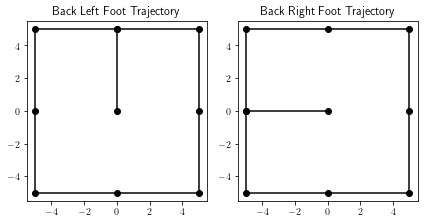

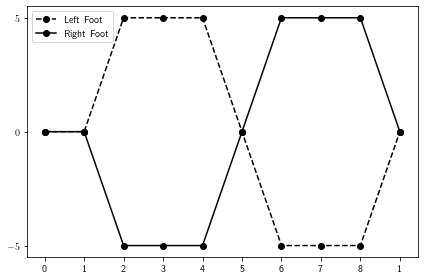

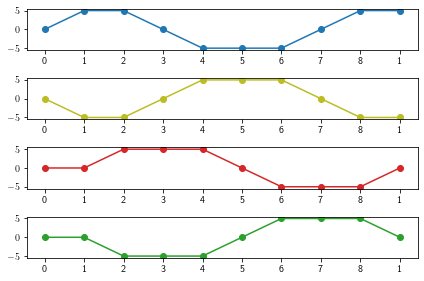

In [9]:
# For the plots we need two more dimensions of movement.
bl_x = [0, 0, -5, -5, -5, 0, 5, 5, 5, 0]
br_y = [0, 0, 5, 5, 5, 0, -5, -5, -5, 0]

f, ax = plt.subplots(1, 2)
ax[0].set_aspect('equal')
ax[0].plot(bl_x, bl_y, 'ko-')
ax[0].set_title('Back Left Foot Trajectory')

ax[1].set_aspect('equal')
ax[1].plot(br_x, br_y, 'ko-')
ax[1].set_title('Back Right Foot Trajectory')

plt.figure()
plt.plot(fl_z, 'o--', color='k', label='Left Foot')
plt.plot(fr_z, 'o-', color='k', label='Right Foot')
plt.legend()
plt.xticks(range(10), gait_step_names)
plt.yticks([-5, 0, 5])

col = 'C0 C8 C3 C2'.split()
f, ax = plt.subplots(4, 1)
for i,a in enumerate(ax):
    a.plot(gait[i], 'o-', color=col[i])
    a.set_xticks(range(10), gait_step_names)

# GRIPPER CONCEPT 

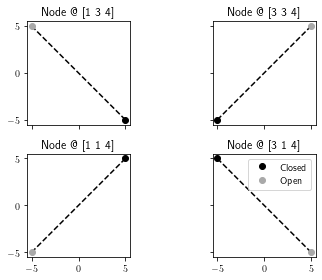

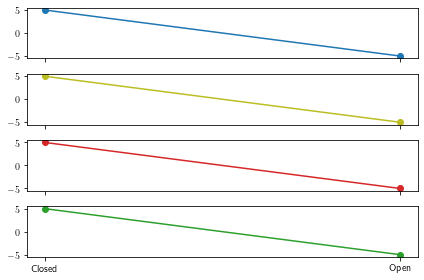

In [18]:
d = 5

left_top_x = (d, -d) 
right_top_x = (-d, d) 
left_bottom_x = (d, -d)  
right_bottom_x = (-d, d) 
left_top_y = (-d, d) 
right_top_y = (-d, d)
left_bottom_y = (d, -d)
right_bottom_y = (d, -d) 

gait = np.array([
    left_top_x, right_top_x,  left_bottom_x, right_bottom_x,
    left_top_y, right_top_y,  left_bottom_y, right_bottom_y])


# Note we only actually select SOME of these as control nodes
# for the IK problem because otherwise it's overdetermined.
# Do the selection by trying to add a control node, and if you
# fail, flagging that servo as redundant.
nodes = [
    Node(1, 3, 4),
    Node(3, 3, 4),
    Node(1, 1, 4),
    Node(3, 1, 4)]

v = Voxels()
v.add_effector(Node(2, 1, 1))
v.add_effector(Node(1, 2, 1))
v.add_effector(Node(2, 3, 1))
v.add_effector(Node(3, 2, 1))

which_controls = []
for direction in (Servo.X, Servo.Y):
    for node in nodes:
        OK = True
        try:
            v.add_servo(node, direction)
        except Exception as e:
            OK = False
        which_controls.append(OK)
used_gait = gait[which_controls, :]


# Simulate and record the servo positions for the two poses.
res = v.simulate(used_gait)
sb, sy, sr, sg = res[:,Servo.Z,:]


f, ax = plt.subplots(2, 2, sharex=True, sharey=True)
for i,a in enumerate(ax.ravel()):
    x, y = gait[i,:], gait[i+4,:]
    a.plot(x, y, 'k--')
    a.plot(x[0], y[0], 'o', color='k', label='Closed')
    a.plot(x[1], y[1], 'o', color='darkgrey', label='Open')
    a.set_title(f'Node @ {nodes[i].pos}')
    a.set_aspect('equal')
a.set_xticks([-5, 0, 5])
a.set_yticks([-5, 0, 5])
a.legend();

f, ax = plt.subplots(4, 1, sharex=True, sharey=True)
for i,a in enumerate(ax):
    a.plot(res[i,2,:], 'o-', color=col[i])
a.set_xticks([0, 1], ['Closed', 'Open'])